# Project on Decision Trees and Random Forests:


**This dataset contains incidents derived from SFPD Crime Incident Reporting system. The data ranges from 1/1/2003 to 5/13/2015. There are 9 variables:**

- Dates - timestamp of the crime incident

- Category - category of the crime incident

- Descript - detailed description of the crime incident

- DayOfWeek - the day of the week

- PdDistrict - name of the Police Department District

- Resolution - how the crime incident was resolved

- Address - the approximate street address of the crime incident

- X - Longitude

- Y - Latitude

    **1. Explore the dataset for anomalies and missing values and take corrective actions if necessary.**

    **2. The dataset has only two numerical variables. Most of the information is in the form of string categories. Not including them in your model would lead to lack of information for an accurate prediction.**

    **3. Use an appropriate technique to convert the text columns to numerical so that they can be used for building the model.** 

    **4. Taking the 'Resolution' as a dependent variable, build a decition tree model using the data. Try to achive an accuracy of of at least 80% or more.**

    **5. Additionally also fit a Random forest regression the data.**

    **6. Vary the hyperparameters in the Random forest Classifier as it may take the model a log time to run do to the size of the data. You can try varying 'n_estimators' and 'max_depth' in order to reduce processing time.** 

    **7. Try to fetch the min value for n_estimators and max_depth which will execute fast while matching the accuracy of a model built with default arguments.**

    **8. Comment on each model's performance.**
    
 ### All the Best!!!

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("SF_Crimes.csv")
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [3]:
print("Dimension of dataset:", data.shape)
print("Number of rows in the dataset:", data.shape[0])
print("Number of columns in the dataset:", data.shape[1])

Dimension of dataset: (878049, 9)
Number of rows in the dataset: 878049
Number of columns in the dataset: 9


In [4]:
print("Column Names:",data.columns.values)

Column Names: ['Dates' 'Category' 'Descript' 'DayOfWeek' 'PdDistrict' 'Resolution'
 'Address' 'X' 'Y']


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [6]:
data.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


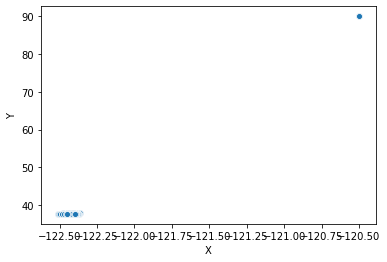

In [7]:
sns.scatterplot(data=data,x='X',y='Y')

In [8]:
miss_val = data.isna().sum()
miss_val

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [9]:
data_ct = data.select_dtypes(include='object')
data_ct.head()


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST


In [10]:
data_num = data.select_dtypes(include=['float64','int64'])
data_num.head()

,X,Y
0,-122.425892,37.774599
1,-122.425892,37.774599
2,-122.424363,37.800414
3,-122.426995,37.800873
4,-122.438738,37.771541


In [11]:
data.Address.value_counts()

800 Block of BRYANT ST      26533
800 Block of MARKET ST       6581
2000 Block of MISSION ST     5097
1000 Block of POTRERO AV     4063
900 Block of MARKET ST       3251
                            ...  
MORAGA ST / 40TH AV             1
43RD AV / GEARY BL              1
TARAVAL ST / 12TH AV            1
POINTLOBOS AV / 45TH AV         1
FRANCE AV / LISBON ST           1
Name: Address, Length: 23228, dtype: int64

In [12]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [13]:
data['Category'].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
n=LabelEncoder()
n=n.fit(data['Category'])

In [16]:
n

LabelEncoder()

In [17]:
n.transform(data['Category'])

array([37, 21, 21, ..., 16, 35, 12])

In [18]:
data['Category']= n.transform(data['Category'])

In [19]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,37,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,21,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,21,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,16,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,16,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [23]:
data['Descript'].value_counts()

GRAND THEFT FROM LOCKED AUTO                            60022
LOST PROPERTY                                           31729
BATTERY                                                 27441
STOLEN AUTOMOBILE                                       26897
DRIVERS LICENSE, SUSPENDED OR REVOKED                   26839
                                                        ...  
PURCHASE FEMALE FOR THE PURPOSE OF PROSTITUTION             1
ENCOURAGE MINOR TO USE CONTROLLED SUBSTANCE                 1
VIOLATION OF CALIF UNEMPLOYMENT INSURANCE ACT               1
PROCUREMENT, PIMPING, & PANDERING                           1
ASSAULT, AGGRAVATED, ON POLICE OFFICER, W/ SEMI AUTO        1
Name: Descript, Length: 879, dtype: int64

In [24]:
data['DayOfWeek'].value_counts()

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

In [25]:
data['PdDistrict'].value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

In [26]:
n=LabelEncoder()
n=n.fit(data['DayOfWeek'])

In [27]:
n.transform(data['DayOfWeek'])

array([6, 6, 6, ..., 1, 1, 1])

In [28]:
data['DayOfWeek']= n.transform(data['DayOfWeek'])

In [29]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,37,WARRANT ARREST,6,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,21,TRAFFIC VIOLATION ARREST,6,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,21,TRAFFIC VIOLATION ARREST,6,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,16,GRAND THEFT FROM LOCKED AUTO,6,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,16,GRAND THEFT FROM LOCKED AUTO,6,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [35]:
n=LabelEncoder()
n=n.fit(data['PdDistrict'])

In [36]:
n.transform(data['PdDistrict'])

array([4, 4, 4, ..., 7, 7, 0])

In [37]:
data['PdDistrict']= n.transform(data['PdDistrict'])

In [38]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,37,WARRANT ARREST,4,4,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,21,TRAFFIC VIOLATION ARREST,4,4,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,21,TRAFFIC VIOLATION ARREST,4,4,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,16,GRAND THEFT FROM LOCKED AUTO,4,4,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,16,GRAND THEFT FROM LOCKED AUTO,5,5,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [39]:
n=LabelEncoder()
n=n.fit(data['Resolution'])

In [40]:
n.transform(data['Resolution'])

array([ 0,  0,  0, ..., 11, 11, 11])

In [41]:
data['Resolution']= n.transform(data['Resolution'])

In [42]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,37,WARRANT ARREST,4,4,0,OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,21,TRAFFIC VIOLATION ARREST,4,4,0,OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,21,TRAFFIC VIOLATION ARREST,4,4,0,VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,16,GRAND THEFT FROM LOCKED AUTO,4,4,11,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,16,GRAND THEFT FROM LOCKED AUTO,5,5,11,100 Block of BRODERICK ST,-122.438738,37.771541


In [45]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data.drop(['Dates','Descript','Address'],axis=1),test_size=0.30,random_state = 1)

In [48]:
train_x = train.drop(['Resolution'], axis = 1)
train_y = train['Resolution']

test_x = test.drop(['Resolution'],axis = 1)
test_y = test['Resolution']


In [50]:
train_x.head()

,Category,DayOfWeek,PdDistrict,X,Y
427788,16,7,7,-122.396171,37.784603
672193,36,2,2,-122.418495,37.742764
132487,16,8,8,-122.492068,37.714362
320506,16,8,8,-122.472860,37.726893
355503,16,1,1,-122.405065,37.798013


In [51]:
train_y.head()

427788    11
672193    11
132487    11
320506    11
355503    11
Name: Resolution, dtype: int64

In [52]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()
tree_model=tree_model.fit(train_x,train_y)

In [53]:
test_pred=tree_model.predict(test_x)

In [54]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y,test_pred))

0.7328891672835639


In [64]:
from sklearn.ensemble import RandomForestClassifier
r_model = RandomForestClassifier()
r_model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
rf_pred=r_model.predict(test_x)

In [66]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y,rf_pred))

0.7487652563445514


In [67]:
from sklearn.ensemble import RandomForestClassifier
r_model = RandomForestClassifier(n_estimators=20)
r_model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
rf_pred=r_model.predict(test_x)

In [69]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y,rf_pred))

0.7467304443558643


In [73]:
from sklearn.ensemble import RandomForestClassifier
r_model = RandomForestClassifier(n_estimators=20,max_depth=5)
r_model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
rf_pred=r_model.predict(test_x)

In [75]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y,rf_pred))

0.6938746844333087


In [85]:
from sklearn.ensemble import RandomForestClassifier
r_model = RandomForestClassifier(n_estimators=5)
r_model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
rf_pred=r_model.predict(test_x)

In [87]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y,rf_pred))

0.7402122126682231


In [112]:
from sklearn.ensemble import RandomForestClassifier
r_model = RandomForestClassifier(n_estimators=20,max_depth=27)
r_model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=27, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [113]:
rf_pred=r_model.predict(test_x)

In [114]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y,rf_pred))

0.7509101607729248


In [115]:
rf_pred=r_model.predict(train_x)

In [116]:
from sklearn.metrics import accuracy_score
print(accuracy_score(train_y,rf_pred))

0.8203060683268417


In [ ]:
# train data was used to create the model and it generated an accuracy of 82%.
# for test data the accuracy was 75%.